In [15]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [32]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.applications import inception_resnet_v2
#from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import regularizers

In [18]:
datagen_train = ImageDataGenerator(
    rescale=1./255,
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

In [19]:
path = '/home/jgomez/Documents/Us'

In [20]:
train_dir = path + "/train"
test_dir = path+"/val"

In [26]:
batch_size = 32
img_height = 224
img_width = 224

In [33]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    
    def add_conv_block(model, num_filters):
        
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dropout(0.2))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(224, 224, 3)))
    model = add_conv_block(model, 32)
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 401408)           

In [27]:
input_shape = model.layers[0].output_shape[1:3]
input_shape

(224, 224)

In [28]:
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    shuffle=True)

Found 23038 images belonging to 2 classes.


In [29]:
datagen_test = ImageDataGenerator(rescale=1./255)

In [30]:
generator_test = datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)

Found 1186 images belonging to 2 classes.


In [34]:
h = model.fit(
    generator_train,
    validation_data=generator_test,
    epochs=50, 
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/50
720/720 [==============================] - 851s 1s/step - loss: 0.9927 - accuracy: 0.5175 - val_loss: 0.8344 - val_accuracy: 0.5236
Epoch 2/50
720/720 [==============================] - 850s 1s/step - loss: 0.7903 - accuracy: 0.5211 - val_loss: 0.7572 - val_accuracy: 0.5143
Epoch 3/50
720/720 [==============================] - 846s 1s/step - loss: 0.7353 - accuracy: 0.5184 - val_loss: 0.7208 - val_accuracy: 0.5000
Epoch 4/50
720/720 [==============================] - 851s 1s/step - loss: 0.7106 - accuracy: 0.5238 - val_loss: 0.7068 - val_accuracy: 0.5076
Epoch 5/50
720/720 [==============================] - 850s 1s/step - loss: 0.6992 - accuracy: 0.5182 - val_loss: 0.6979 - val_accuracy: 0.5025
Epoch 6/50
720/720 [==============================] - 853s 1s/step - loss: 0.6949 - accuracy: 0.5199 - val_loss: 0.6957 - val_accuracy: 0.5017
Epoch 7/50
720/720 [==============================] - 852s 1s/step - loss: 0.6928 - accuracy: 0.5215 - val_loss: 0.6943 - val_accuracy: 0.5177

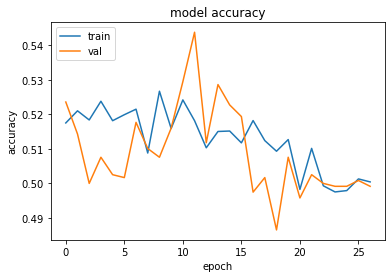

In [44]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
